## Road Accident Severity Prediction

#### Team:
   * **Hoa Nguyen**
   * **Shailesh Krishna**
   * **Sheetal Kalburgi**
   
#### Overview:
   * Our notebook is divided into five sections.
       * Initial Data Analysis
       * Train/Validation/Test Split
       * Model Building
       * Summary
       * Save Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# ignore warnings.
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
from numpy.random import seed # To get reproducible results
seed(18)

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from mixed_naive_bayes import MixedNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import LinearSVC

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed # Tensorflow seed
set_seed(18)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

# save model
import pickle

# display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## I. Initial Data Analysis

#### 1. Read the data

In [2]:
# Read the data
data = pd.read_csv('RoadAccident.csv', encoding='utf-8')

In [3]:
print('There are a total of {} rows and {} columns in the original dataset'.format(data.shape[0],data.shape[1]))

There are a total of 75550 rows and 33 columns in the original dataset


#### 2. Check for null values

In [4]:
print("Are there null values in the original dataset?: {}".format(data.isnull().values.any()))

Are there null values in the original dataset?: False


#### 3. Check column names

In [5]:
print('Column names in the dataset are: \n{}'.format(('\n').join(data.columns)))

Column names in the dataset are: 
Accident_Index
Latitude
Longitude
Region
Urban_or_Rural_Area
X1st_Road_Class
Driver_IMD_Decile
Speed_limit
Road_Type
Road_Surface_Conditions
Weather
High_Wind
Lights
Datetime
Year
Season
Month_of_Year
Day_of_Month
Day_of_Week
Hour_of_Day
Number_of_Vehicles
Age_of_Driver
Age_of_Vehicle
Junction_Detail
Junction_Location
X1st_Point_of_Impact
Driver_Journey_Purpose
Engine_CC
Propulsion_Code
Vehicle_Make
Vehicle_Category
Vehicle_Manoeuvre
Accident_Severity


In [6]:
data.head()

,Accident_Index,Latitude,Longitude,Region,Urban_or_Rural_Area,X1st_Road_Class,Driver_IMD_Decile,Speed_limit,Road_Type,Road_Surface_Conditions,Weather,High_Wind,Lights,Datetime,Year,Season,Month_of_Year,Day_of_Month,Day_of_Week,Hour_of_Day,Number_of_Vehicles,Age_of_Driver,Age_of_Vehicle,Junction_Detail,Junction_Location,X1st_Point_of_Impact,Driver_Journey_Purpose,Engine_CC,Propulsion_Code,Vehicle_Make,Vehicle_Category,Vehicle_Manoeuvre,Accident_Severity
0,1,51.495653,-0.179097,London,Urban,C,7,30,Single carriageway,Dry,Fine,No,Daylight,1/19/10 17:30,2010,4,1,19,2,0.729,2,7,8,Not at junction or within 20 metres,Not at or within 20 metres of junction,Front,Other/Not known,1781,Petrol,Audi,Car,Going ahead,Slight
1,2,51.499635,-0.209915,London,Urban,A,3,30,Single carriageway,Dry,Fine,No,Daylight,2/8/10 11:24,2010,4,2,8,1,0.475,2,5,2,More than 4 arms (not roundabout),Mid Junction - on roundabout or on main road,Offside,Other/Not known,2987,Heavy oil,Mercedes,Car,Waiting to go,Slight
2,3,51.492515,-0.168130,London,Urban,Unclassified,5,30,Single carriageway,Dry,Fine,No,Daylight,3/3/10 06:25,2010,4,3,3,3,0.267,2,5,11,Crossroads,Mid Junction - on roundabout or on main road,Front,Journey as part of work,998,Petrol,Nissan,Car,Going ahead,Slight
3,4,51.504784,-0.193863,London,Urban,A,2,30,Single carriageway,Dry,Fine,No,Daylight,3/4/10 13:35,2010,4,3,4,4,0.566,2,3,5,T or staggered junction,Mid Junction - on roundabout or on main road,Offside,Journey as part of work,2179,Heavy oil,Citroen,Van,Turning right,Slight
4,5,51.522072,-0.212927,London,Urban,B,3,30,Single carriageway,Wet or damp,Fine,No,Daylight,3/12/10 16:05,2010,4,3,12,5,0.670,1,4,4,T or staggered junction,Approaching junction or waiting/parked at junc...,Nearside,Journey as part of work,2198,Heavy oil,Ford,Van,Overtaking,Slight


#### 4. Check data types 

In [7]:
# Data types
column_datatypes = set()
for column in data.columns:
    column_datatypes.add(str(data[column].dtype))
print("The dataset contains {} different data types and they are: {}".format(len(column_datatypes), ", ".join(column_datatypes)))

The dataset contains 3 different data types and they are: object, int64, float64


#### 5. Define X and y

In [8]:
X = data.drop(columns='Accident_Severity')
y = data['Accident_Severity']

#### 6. Check feature distribution

In [9]:
numerical_features = list()
categorical_features = list()
for column in X.columns:
    # In the dataset we only have float and int64.
    if (data[column].dtype == 'float64' or data[column].dtype == 'int64'):
        numerical_features.append(column)
    # Categorical
    elif (data[column].dtype == 'object'):
        categorical_features.append(column)

##### 6.a. Numerical Features

In [10]:
print('There are a total of {} numerical features in the dataset.'.format(len(numerical_features)))

There are a total of 15 numerical features in the dataset.


In [11]:
X_num_total = X[numerical_features]

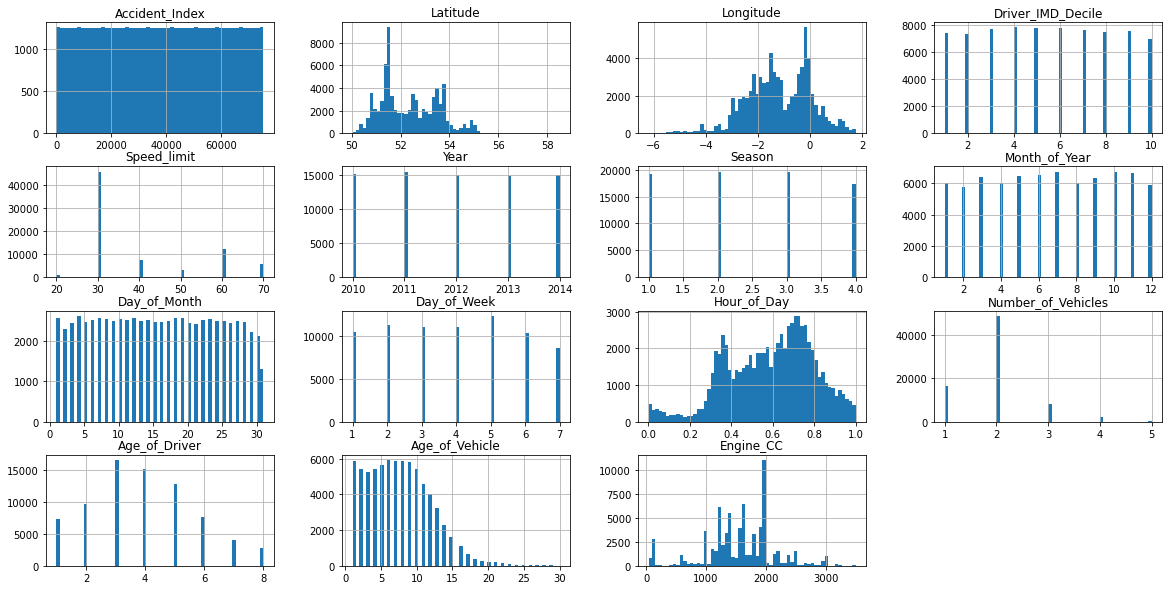

In [12]:
X_num_total.hist(bins=60,figsize=(20, 10))
plt.show()

In [13]:
# Check accident index values
print('Uniques values of Accident Index column are: {}'.format(X_num_total['Accident_Index'].nunique()))

Uniques values of Accident Index column are: 75550


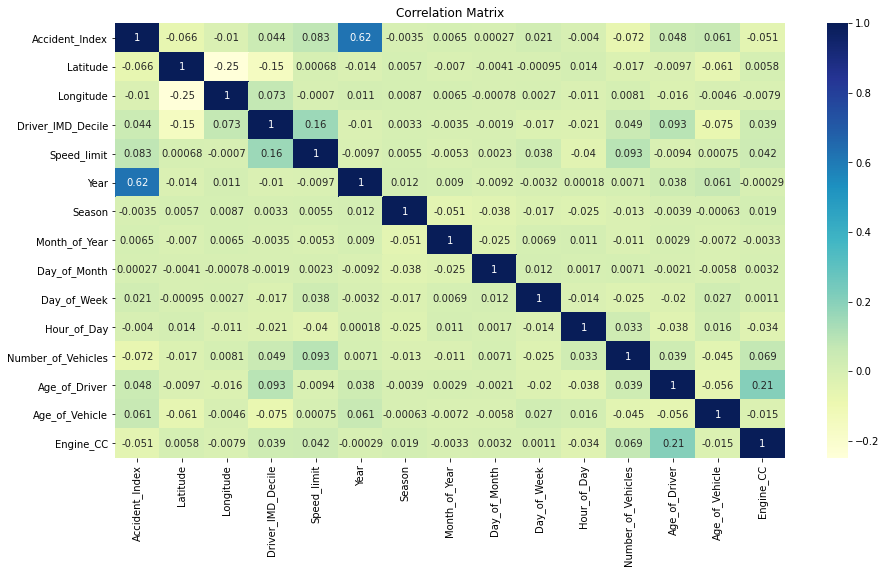

In [14]:
# Checking the correlation between the numerical features
plt.subplots(figsize=(15,8))
sns.heatmap(X_num_total.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Matrix')
plt.show()

##### 6.b. Categorical Features

In [15]:
print('There are a total of {} categorical features in the dataset.'.format(len(categorical_features)))

There are a total of 17 categorical features in the dataset.


In [16]:
X_cat_total = X[categorical_features]

In [17]:
print('Unique values for each categorical column are:\n {}'.format(X_cat_total.nunique()))

Unique values for each categorical column are:
 Region                        11
Urban_or_Rural_Area            2
X1st_Road_Class                6
Road_Type                      5
Road_Surface_Conditions        5
Weather                        6
High_Wind                      2
Lights                         4
Datetime                   67926
Junction_Detail                8
Junction_Location              9
X1st_Point_of_Impact           5
Driver_Journey_Purpose         5
Propulsion_Code                2
Vehicle_Make                  25
Vehicle_Category               6
Vehicle_Manoeuvre             11
dtype: int64


* **From the above, we can infer that the numerical features comprise of both the continuous and discrete features**.
* **Accident_Index and Datetime columns in the dataset serve as an id value for the records and can be excluded from the feature set**.

#### 7. Drop Accident_Index and Datetime columns from X

In [18]:
X = X.drop(columns=['Accident_Index','Datetime'])

In [19]:
print('Total of number of features in the cleaned dataset are: {}'.format(X.shape[1]))

Total of number of features in the cleaned dataset are: 30


#### 8. Refresh the list of numerical and categorical features. 
   * Add discrete numerical features to categorical features list.
   * Remove discrete values from numerical features list.

In [20]:
discrete_features = ['Driver_IMD_Decile','Speed_limit','Year','Season','Month_of_Year','Day_of_Month','Day_of_Week','Number_of_Vehicles','Age_of_Driver']

In [21]:
for item in discrete_features:
    numerical_features.remove(item)
    categorical_features.append(item)

In [22]:
# remove Datetime and Accident_Index from list.
numerical_features.remove('Accident_Index')
categorical_features.remove('Datetime')

In [23]:
print('The total of numerical features left are: {}'.format(len(numerical_features)))

The total of numerical features left are: 5


In [24]:
print('The total of categorical features are: {}'.format(len(categorical_features)))

The total of categorical features are: 25


## II. Train/Test Split

###### 1. Label Encode categorical features and y.

In [25]:
# categorical feature list
categorical_features_index = list()
# Encode categorical features, get the indexes of categorical 
for i in categorical_features:
    categorical_features_index.append(X.columns.get_loc(i))
    X[i] = LabelEncoder().fit_transform(X[i])

In [26]:
X.head()

,Latitude,Longitude,Region,Urban_or_Rural_Area,X1st_Road_Class,Driver_IMD_Decile,Speed_limit,Road_Type,Road_Surface_Conditions,Weather,High_Wind,Lights,Year,Season,Month_of_Year,Day_of_Month,Day_of_Week,Hour_of_Day,Number_of_Vehicles,Age_of_Driver,Age_of_Vehicle,Junction_Detail,Junction_Location,X1st_Point_of_Impact,Driver_Journey_Purpose,Engine_CC,Propulsion_Code,Vehicle_Make,Vehicle_Category,Vehicle_Manoeuvre
0,51.495653,-0.179097,2,1,3,6,1,3,0,0,0,3,0,3,0,18,1,0.729,1,6,8,2,8,2,2,1781,1,0,1,1
1,51.499635,-0.209915,2,1,0,2,1,3,0,0,0,3,0,3,1,7,0,0.475,1,4,2,1,7,4,2,2987,0,10,1,10
2,51.492515,-0.168130,2,1,5,4,1,3,0,0,0,3,0,3,2,2,2,0.267,1,4,11,0,7,2,1,998,1,12,1,1
3,51.504784,-0.193863,2,1,0,1,1,3,0,0,0,3,0,3,2,3,3,0.566,1,2,5,7,7,4,1,2179,0,2,5,8
4,51.522072,-0.212927,2,1,2,2,1,3,4,0,0,3,0,3,2,11,4,0.670,0,3,4,7,0,3,1,2198,0,4,5,3


In [27]:
 y = LabelEncoder().fit_transform(y)

###### 2. Train/Test Split
* Split the data into train and test set. (75-25 split ratio)
* Split the training set into training and validation sets. For the entire dataset we did a 60-15-25 split.

In [28]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size = 0.25, random_state = 18)

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.2, random_state = 18)

## III. Model Building

### Model 1: Using SVC

###### 1. Define hyperparameters
* Tuning C and gamma value

In [30]:
# Creating the combinations for different values of epsilon and min_samples.
svc_C = [0.1,1,10,20]
svc_gamma = [0.1,0.5,1,2,3,4]
total_svc_pairs = list(itertools.product(svc_C, svc_gamma))
print('Total number of hyperparameter pairs for SVC are: {}'.format(len(total_svc_pairs)))

Total number of hyperparameter pairs for SVC are: 24


###### 2. Determine the best pair

In [31]:
svc_validation_misclassification_rates = list()
for pair in total_svc_pairs:
    svc = SVC(kernel='rbf', random_state=18,C=pair[0], gamma=pair[1])
    svc.fit(X_train,y_train)
    y_hat_valid = svc.predict(X_valid)
    svc_validation_misclassification_rates.append(sum(y_hat_valid != y_valid)/ len(y_valid))

In [32]:
# We are using misclassification rate hence to determine the bestK we need to use argmin instead of argmax.
bestK = np.argmin(svc_validation_misclassification_rates) + 1
print("The best K value is: {}".format(bestK))

The best K value is: 13


###### 3. Refit the model with the best parameters

In [33]:
svc_best_model = SVC(kernel='rbf', random_state=18, C=total_svc_pairs[bestK][0], gamma=total_svc_pairs[bestK][1])
svc_best_model.fit(X_train_valid,y_train_valid)

SVC(C=10, gamma=0.5, random_state=18)

###### 4. Calculate the classification accuracy on the test set

In [34]:
print("The classification accuracy on the test set for SVC using rbf kernel is: {:.2%}".format(np.mean(svc_best_model.predict(X_test) == y_test)))

The classification accuracy on the test set for SVC using rbf kernel is: 75.06%


#### SVC Observations:
* After tuning the parameters, the best value for C=10 and gamma=0.5.
* The classification accuracy on the test set for SVC is: 75.06%.
* The execution time of SVC on our dataset is extremely large. Running a GridSearchCV with cv=10 also resulted in the same classification accuracy on the test set. 

### Model 2: Using Naïve Bayes

#### A. Mixed Naïve Bayes

###### 1. Define hyperparameters
* Tuning alpha value

In [35]:
mixed_nb_alpha = [1.0,1.5,2.0,2.5,3.0,3.5,4.0]

###### 2. Determine the best alpha value

In [36]:
mixedNB_validation_misclassification_rates = list()
for alpha in mixed_nb_alpha:
    mixedNB = MixedNB(categorical_features=categorical_features_index, alpha=alpha)
    mixedNB.fit(X_train,y_train)
    y_hat_valid = mixedNB.predict(X_valid)
    mixedNB_validation_misclassification_rates.append(sum(y_hat_valid != y_valid)/ len(y_valid))

[11  2  6  5  5  6  2  4  8  9  5  5  2 25  6 11 10  6  5  4 12 31  7  5
  8]
[11  2  6  5  5  6  2  4  8  9  5  5  2 25  6 11 10  6  5  4 12 31  7  5
  8]
[11  2  6  5  5  6  2  4  8  9  5  5  2 25  6 11 10  6  5  4 12 31  7  5
  8]
[11  2  6  5  5  6  2  4  8  9  5  5  2 25  6 11 10  6  5  4 12 31  7  5
  8]
[11  2  6  5  5  6  2  4  8  9  5  5  2 25  6 11 10  6  5  4 12 31  7  5
  8]
[11  2  6  5  5  6  2  4  8  9  5  5  2 25  6 11 10  6  5  4 12 31  7  5
  8]
[11  2  6  5  5  6  2  4  8  9  5  5  2 25  6 11 10  6  5  4 12 31  7  5
  8]


In [37]:
# We are using misclassification rate hence to determine the bestK we need to use argmin instead of argmax.
bestK_mixedNB = np.argmin(mixedNB_validation_misclassification_rates) + 1
print("The best K value is: {}".format(bestK_mixedNB))

The best K value is: 6


In [38]:
print('The best alpha value for mixed Naïve Bayes is: {}'.format(mixed_nb_alpha[bestK_mixedNB]))

The best alpha value for mixed Naïve Bayes is: 4.0


###### 3. Refit the model with the best parameters

In [39]:
mixedNB_best_model = MixedNB(categorical_features=categorical_features_index, alpha=mixed_nb_alpha[bestK_mixedNB])
mixedNB_best_model.fit(X_train_valid,y_train_valid)

[11  2  6  5  5  6  2  4  8  9  5  5  2 25  6 11 10  6  5  4 12 31  7  5
  8]


MixedNB(alpha=4.0, var_smoothing=1e-09)

###### 4. Calculate the classification accuracy on the test set

In [40]:
print("The classification accuracy on the test set for mixed Naïve Bayes is: {:.2%}".format(np.mean(mixedNB_best_model.predict(X_test) == y_test)))

The classification accuracy on the test set for mixed Naïve Bayes is: 73.03%


#### B. Categorical Naïve Bayes

###### 1. Define the pipeline

In [41]:
# Define the pipeline
nbc_pipeline = Pipeline([
    ('categoricalnb', CategoricalNB())
])
nbc_parameters = {
    'categoricalnb__alpha': [1.0,1.5,2.0,2.5,3.0,3.5,4.0] # values smaller than 1 give numerical error.
}

In [42]:
nbc_search = GridSearchCV(nbc_pipeline, nbc_parameters, scoring="accuracy", cv = 10, n_jobs=-1)

###### 2. Fit the model

In [43]:
nbc_best_model = nbc_search.fit(X_train_valid[categorical_features],y_train_valid)

In [44]:
print('The best value of alpha is: {}'.format(nbc_best_model.best_params_['categoricalnb__alpha']))

The best value of alpha is: 1.5


###### 3. Calculate the classification accuracy on the test set

In [45]:
print('For Naïve Bayes using only categorical features, the accuracy on the test set is: {:.2f}%'.format(np.mean(nbc_best_model.predict(X_test[categorical_features]) == y_test) * 100))

For Naïve Bayes using only categorical features, the accuracy on the test set is: 73.43%


#### Naïve Bayes Observations:
* After tuning the alpha values, the best alpha value for mixed Naïve Bayes is 4.0 and for categorical Naïve Bayes is 1.5
* Accuracy on the test set using only categorical features is slightly more that the mixed Naïve Bayes using both the numerical as well as categorical features.
* Performance of Naïve Bayes classifier is less than the SVC.

### Model 3: Using Neural Network

###### 1. Define the wrapper

In [46]:
# Define the wrapper
def build_model(input_dim=X_train_valid.shape[1], n_hidden = 1, n_neurons=1, activation='relu', optimizer='Adam'):
    model = Sequential() # Model instantiation
    options = {"input_dim": input_dim} # Setting the input dimensions
    # iterate over layers to create various layers
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation=activation, **options))
        # Add dropout layer
        if not layer == (n_hidden - 1):
            model.add(Dropout(0.2))
        options = {} # remove the input dimensions
    # Add the output layer
    model.add(Dense(1,activation='sigmoid'))
    # Compile the model
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer= optimizer)
    return model

In [47]:
nn_classifier = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)

###### 2. Early stopping

In [48]:
# Employing early stopping, creating a callback method to use with the model.
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)

###### 3. Define the parameters

In [49]:
# Parameters.
optimizer = ['SGD', 'Adam']
activation = ['relu', 'tanh','sigmoid']
neurons = [1, 5, 10, 15]
hidden = [2,3,4]
# Defining the grid to be used with GridSearchCV
parameter_grid = {
    'optimizer': optimizer,
    'activation': activation,
    'n_neurons': neurons,
    'n_hidden': hidden
}

In [50]:
# Setting up GridSearchCV
grid_cv = GridSearchCV(nn_classifier, parameter_grid, cv = 2, n_jobs=-1) 

###### 4. Fit the data

In [51]:
# Fit the model
grid_cv.fit(X_train, y_train, epochs = 50, validation_data = (X_valid, y_valid), batch_size = 32, callbacks = callback)

Epoch 1/50
1417/1417 [==============================] - 4s 3ms/step - loss: 1.8092 - accuracy: 0.7052 - val_loss: 0.5637 - val_accuracy: 0.7513
Epoch 2/50
1417/1417 [==============================] - 1s 967us/step - loss: 0.6003 - accuracy: 0.7318 - val_loss: 0.6538 - val_accuracy: 0.64538 - accuracy: 0.73
Epoch 3/50
1417/1417 [==============================] - 1s 960us/step - loss: 0.5930 - accuracy: 0.7353 - val_loss: 0.5789 - val_accuracy: 0.7519
Epoch 4/50
1417/1417 [==============================] - 1s 968us/step - loss: 0.5848 - accuracy: 0.7392 - val_loss: 0.5513 - val_accuracy: 0.7525
Epoch 5/50
1417/1417 [==============================] - 1s 925us/step - loss: 0.5742 - accuracy: 0.7433 - val_loss: 0.5438 - val_accuracy: 0.7523
Epoch 6/50
1417/1417 [==============================] - 1s 928us/step - loss: 0.5721 - accuracy: 0.7439 - val_loss: 0.5691 - val_accuracy: 0.7524
Epoch 7/50
1417/1417 [==============================] - 1s 887us/step - loss: 0.5624 - accuracy: 0.7472 - va

GridSearchCV(cv=2,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fd718295c10>,
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'sigmoid'],
                         'n_hidden': [2, 3, 4], 'n_neurons': [1, 5, 10, 15],
                         'optimizer': ['SGD', 'Adam']})

###### 5. Best parameters

In [52]:
print('The best parameters values are: \n activation function: {}\
                                       \n hidden layers: {}\
                                       \n number of neurons: {}\
                                       \n optimizer: {}'.format(grid_cv.best_params_['activation'],\
                                                                grid_cv.best_params_['n_hidden'],\
                                                                grid_cv.best_params_['n_neurons'],\
                                                                grid_cv.best_params_['optimizer']))

The best parameters values are: 
 activation function: relu                                       
 hidden layers: 2                                       
 number of neurons: 15                                       
 optimizer: Adam


###### 5. Refit the model

In [54]:
nn_best_model = Sequential([
    Dense(15, input_dim=X_train_valid.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),loss = 'binary_crossentropy', metrics = 'accuracy')

In [55]:
nn_best_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                465       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 16        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Employing early stopping, creating a callback method to use with the model.
callback2 = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 5)

In [57]:
nn_best_model.fit(X_train_valid,y_train_valid,epochs = 50,callbacks = callback2)

Epoch 1/50
1771/1771 [==============================] - 1s 604us/step - loss: 1.1353 - accuracy: 0.7290
Epoch 2/50
1771/1771 [==============================] - 1s 604us/step - loss: 0.5607 - accuracy: 0.7507
Epoch 3/50
1771/1771 [==============================] - 1s 610us/step - loss: 0.5607 - accuracy: 0.7504
Epoch 4/50
1771/1771 [==============================] - 1s 617us/step - loss: 0.5619 - accuracy: 0.7506
Epoch 5/50
1771/1771 [==============================] - 1s 612us/step - loss: 0.5619 - accuracy: 0.7506
Epoch 6/50
1771/1771 [==============================] - 1s 629us/step - loss: 0.5619 - accuracy: 0.7506
Epoch 7/50
1771/1771 [==============================] - 1s 610us/step - loss: 0.5619 - accuracy: 0.7506


###### 6. Calculate the classification accuracy on the test set

In [58]:
classifier_result = nn_best_model.evaluate(X_test, y_test)

591/591 [==============================] - 0s 390us/step - loss: 0.5619 - accuracy: 0.7505


In [59]:
# Accuracy on test set
print('The classification accuracy on the test set for NN model is: {:.2f}%'.format(classifier_result[1] * 100))

The classification accuracy on the test set for NN model is: 75.05%


### Model 4: Stacking

###### 1. Define the classifiers with best parameters

In [60]:
# SVC with best parameters
svc_with_best_params = SVC(kernel='rbf', random_state=18,C=total_svc_pairs[bestK][0], gamma=total_svc_pairs[bestK][1])

In [61]:
# MixedNB with best parameters.
mixedNB_with_best_params = MixedNB(categorical_features=categorical_features_index,alpha=mixed_nb_alpha[bestK_mixedNB])

In [62]:
# NN model with best parameters
nn_model_with_best_params = Sequential([
    Dense(15, input_dim=X_train_valid.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model_with_best_params.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),loss = 'binary_crossentropy', metrics = 'accuracy')

###### 2. Stacking model list + Blender

In [63]:
# Stacking models
stacking_models = {
    'SVC':svc_with_best_params,
    'MixedNB':mixedNB_with_best_params,
    'NN':nn_model_with_best_params,
}

In [64]:
# Define the blender
blender = LinearSVC()

###### 3. Split the data to train weak learners and blender

In [65]:
X_trainS1, X_trainS2, y_train1, y_train2 = train_test_split(X_train_valid, y_train_valid, test_size = 0.2, random_state = 18)

###### 4. Train the learners

In [66]:
# Train the learners
for name, model in stacking_models.items():
    model.fit(X_trainS1, y_train1)

[11  2  6  5  5  6  2  4  8  9  5  5  2 25  6 11 10  6  5  4 12 31  7  5
  8]
1417/1417 [==============================] - 1s 614us/step - loss: 1.1716 - accuracy: 0.7326


###### 5. Train the blender

In [67]:
# Train the blender
# Get the prediction
predictions = pd.DataFrame() # Set up a dataframe to store the predictions
for name, model in stacking_models.items():
    predictions[name] = model.predict(X_trainS2)

# Get the blender
scaler_blend = StandardScaler() # Scale the predictions for SVR
predictions_scale = scaler_blend.fit_transform(predictions)
blender.fit(predictions_scale, y_train2)

LinearSVC()

###### 6. Calculate accuracy on the test set

In [68]:
# Perform evaluation
# First send the data through the weak learners
predictions = pd.DataFrame() # Set up a dataframe to store the predictions
for name, model in stacking_models.items():
    predictions[name] = model.predict(X_test)
    
# Prediction through the blender, and evaluate
predictions_scale = scaler_blend.transform(predictions)
print('Accuracy of the blender on the test set is: {:.2f}%'.format(np.mean(blender.predict(predictions_scale) == y_test)*100))

Accuracy of the blender on the test set is: 75.05%


## IV. Summary
* There are a total of 75550 rows and 33 columns in the original dataset. 
* Upon analysis we determined that there are 15 numerical features, out of them only 5 are continuous.  
* We treated discrete numerical features as categorical features and label encoded them along with the categorical features, making total number of categorical features as 25.
* From the list of features, we dropped Accident_Index and Datetime column as they were more of an identifier for the record, rather than an attribute.**
* The entire dataset was divided using 60-15-25 (train/validation/test) split.
* We created a total of 4 classifiers and also employed stacking ensemble method to build our classifiers.
* The classification accuracy on the test set for both the SVC and NN classifier were comparable, with SVC marginally performing better.
* Naïve Bayes classifiers, both mixed Naïve Bayes and Categorical Naïve Bayes accuracy was less than SVC and NN. However, Categorical Naïve Bayes performed slightly better than mixed Naïve Bayes which makes us think that the continuous features may not be useful predictors.
* Stacking the classifiers, did not improve the accuracy on the classification set, which is obvious since the performance of individual classifiers is comparable or almost similar.
* **We choose SVC model as our best model as it has the highest performance of 75.06% on the test set.**


## V. Save Model

###### 1. Save best SVC Model

In [69]:
pickle.dump(svc_best_model, open( "final_svc_best_model.pickle", "wb" ))

###### 2. Save best Mixed Naïve Bayes Model

In [70]:
pickle.dump(mixedNB_best_model, open( "final_mixedNB_best_model.pickle", "wb" ))

###### 3. Save best NN model

In [71]:
nn_best_model.save('final_nn_best_model') # using model.save method provided by tensorflow to save the model

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: final_nn_best_model/assets
